# Data Merging and Preparation

---

**Updated on:** 2024-05-15

> Authors: Simon Knoblauch (simon.knoblauch@student.uni-tuebingen.de)  
> Input file(s): folder of .csv files to be merged and prepared  
> Output file(s): concatenated .csv file  

**Please read the comments before proceeding to run the code and let us know if you run into any errors or find undocumented pieces of code.**

This notebook is used to merge tables from image analysis and prepare the tables for the 3rd and final step: Feature detection and activity annotation.

In [3]:
from pathlib import Path
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd
from scipy.ndimage import gaussian_filter1d

import sys
sys.path.append(r"..")
from src.microspotreader import *
%matplotlib widget

## User Input

Please input the path to the folder containing all .csv files you would like to merge and prepare into `input_folder` as well as the path to the output folder into `output_folder`. This notebook does not require multiple csv files to work.

In order to assign a retention time to each spot, the time at which fractionation was started and ended need to be defined with the variables `RT_start` and `RT_end`.

In [22]:
# Input Folder containing all .csv spot files with the ending "spotlist.csv".
input_folder = Path(r"../example_files")

# Folder that the output should be saved to.
outputfolder = Path(r"../output")

RT_start = 61  # RT @ which spotting was started
RT_end = 300  # RT @ which spotting was stopped

## Merging of the datasets

In this step the data merging. After the tables of the datasets are concatenated, the spots can either be sorted by increasing index or in a serpentine manner (odd rows go from left to right and even rows from right to left) depending on the way the fractionation was performed. If the fractionation was not performed with a serpentine path, please set the `serpentine` argument in line 3 to `False`,

In [26]:
datasets = [SpotList().from_df(pd.read_csv(item)) for item in input_folder.glob("*.csv")]
spot_list=SpotList().from_list(datasets)
spot_list.sort(serpentine=True)

spot_list.to_df()

,row,row_name,column,type,x_coord,y_coord,radius,halo_radius,spot_intensity,raw_int,note
0,1,A,2,NaN,211,53,25,NaN,0.056492,0.452249,Initial Detection
1,1,A,3,NaN,315,53,24,NaN,0.052143,0.448922,Initial Detection
2,1,A,4,NaN,419,56,25,NaN,0.045964,0.446810,Initial Detection
3,1,A,5,NaN,524,56,25,NaN,0.040631,0.442196,Initial Detection
4,1,A,6,NaN,628,56,24,NaN,0.038242,0.443459,Initial Detection
...,...,...,...,...,...,...,...,...,...,...,...
235,12,L,6,NaN,606,1380,25,NaN,0.000058,0.428433,Initial Detection
236,12,L,5,NaN,499,1378,23,NaN,0.000717,0.429139,Initial Detection
237,12,L,4,NaN,396,1377,25,NaN,0.003899,0.434888,Initial Detection
238,12,L,3,NaN,292,1375,25,NaN,0.010065,0.440901,Initial Detection


## Removal of unnecessary rows and columns

The indexes of rows or columns you wish to remove from the dataset can be input into the lists in line 1 and 2.

In [30]:
rows_to_remove=[]
columns_to_remove=[1]

spot_list.remove_rows(rows_to_remove)
spot_list.remove_columns(columns_to_remove)

spot_list.to_df()


,row,row_name,column,type,x_coord,y_coord,radius,halo_radius,spot_intensity,raw_int,note
0,1,A,2,NaN,211,53,25,NaN,0.056492,0.452249,Initial Detection
1,1,A,3,NaN,315,53,24,NaN,0.052143,0.448922,Initial Detection
2,1,A,4,NaN,419,56,25,NaN,0.045964,0.446810,Initial Detection
3,1,A,5,NaN,524,56,25,NaN,0.040631,0.442196,Initial Detection
4,1,A,6,NaN,628,56,24,NaN,0.038242,0.443459,Initial Detection
...,...,...,...,...,...,...,...,...,...,...,...
235,12,L,6,NaN,606,1380,25,NaN,0.000058,0.428433,Initial Detection
236,12,L,5,NaN,499,1378,23,NaN,0.000717,0.429139,Initial Detection
237,12,L,4,NaN,396,1377,25,NaN,0.003899,0.434888,Initial Detection
238,12,L,3,NaN,292,1375,25,NaN,0.010065,0.440901,Initial Detection


## Adding of Retention Time

After the tables have been merged, the retention time can finally be added. If your data was fractionated in a serpentine manner please set the `serpentine` argument (line 1) to `True` otherwise set it to `False`.

In [38]:
spot_list.sort(serpentine=True)

spot_df=spot_list.to_df()
add_retention_time(spot_df,RT_start,RT_end)

spot_df


,row,row_name,column,type,x_coord,y_coord,radius,halo_radius,spot_intensity,raw_int,note,RT
0,1,A,2,NaN,211,53,25,NaN,0.056492,0.452249,Initial Detection,61.0
1,1,A,3,NaN,315,53,24,NaN,0.052143,0.448922,Initial Detection,62.0
2,1,A,4,NaN,419,56,25,NaN,0.045964,0.446810,Initial Detection,63.0
3,1,A,5,NaN,524,56,25,NaN,0.040631,0.442196,Initial Detection,64.0
4,1,A,6,NaN,628,56,24,NaN,0.038242,0.443459,Initial Detection,65.0
...,...,...,...,...,...,...,...,...,...,...,...,...
235,12,L,6,NaN,606,1380,25,NaN,0.000058,0.428433,Initial Detection,296.0
236,12,L,5,NaN,499,1378,23,NaN,0.000717,0.429139,Initial Detection,297.0
237,12,L,4,NaN,396,1377,25,NaN,0.003899,0.434888,Initial Detection,298.0
238,12,L,3,NaN,292,1375,25,NaN,0.010065,0.440901,Initial Detection,299.0


## Baseline correction and data smoothing

Here the baseline-level is estimated and set to 0. For baseline correction generally no changes to the arguments need to be made.

A 1 dimensional gaussian kernel is passed over the baseline corrected intensities to smooth the chromatogram. The `sigma` argument (line 8) of the filter is generally set to 1. If stronger smoothing is required increase the sigma value. This will however significantly impact the shape of activity peaks, which will negatively effect the correlation of activity to the LC-MS data.

In [ ]:
_, spot_df.spot_intensity = baseline_correction(
    spot_df.spot_intensity,
    conv_lvl=0.001,
    window_lvl=100,
    poly_lvl=1,
)
spot_df.spot_intensity = gaussian_filter1d(
    input=spot_df.spot_intensity.to_numpy(), sigma=1
)

## Results

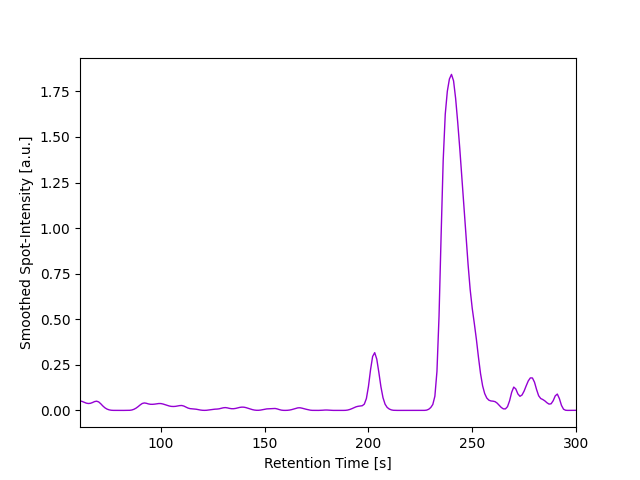

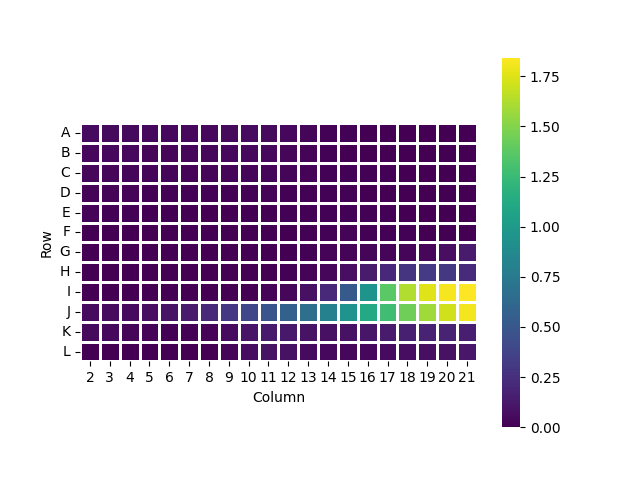

In [35]:
plot_chromatogram(spot_df)

SpotList().from_df(spot_df).plot_heatmap()

spot_df

## Save Results

Run this cell to save the resulting table as a `.csv` file.

In [36]:
if not outputfolder.exists():
    outputfolder.mkdir()

# Generate path for output-file
filename = input_folder.name.split(".")[0] + "_prepared.csv"
outputfile = outputfolder / filename

# Write a csv-file of the results.
spot_df.to_csv(outputfile)

NameError: name 'outputfolder' is not defined